hr_imputed.csv

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# OneHotEncoder, LabelEncoder StandardScaler, train_test_split, PCA, Pipeline, DecisionTreeRegressor, RandomForestRegressor, LinearRegression, KNeighborsRegressor, cross_val_score,mean_squared_error, metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [57]:
from sklearn.model_selection import cross_val_score


In [54]:
from sklearn.ensemble import RandomForestRegressor


In [6]:
data= pd.read_csv("hr_imputed.csv")

In [7]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Undefined,Pvt Ltd,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
2,city_21,0.624,Undefined,No relevent experience,Full time course,Graduate,STEM,5,Undefined,Pvt Ltd,0,83,0.0
3,city_115,0.789,Undefined,No relevent experience,no_enrollment,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0


In [8]:
data.shape

(19158, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  int64  
 8   company_size            19158 non-null  object 
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  int64  
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 1.9+ MB


In [10]:
data.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [11]:
# droping not useful columns

In [38]:
data.drop(["city","gender"], axis=1, inplace=True)

In [39]:
data.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21,Undefined,Pvt Ltd,1,36,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,Undefined,Pvt Ltd,0,83,0.0
3,0.789,No relevent experience,no_enrollment,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0


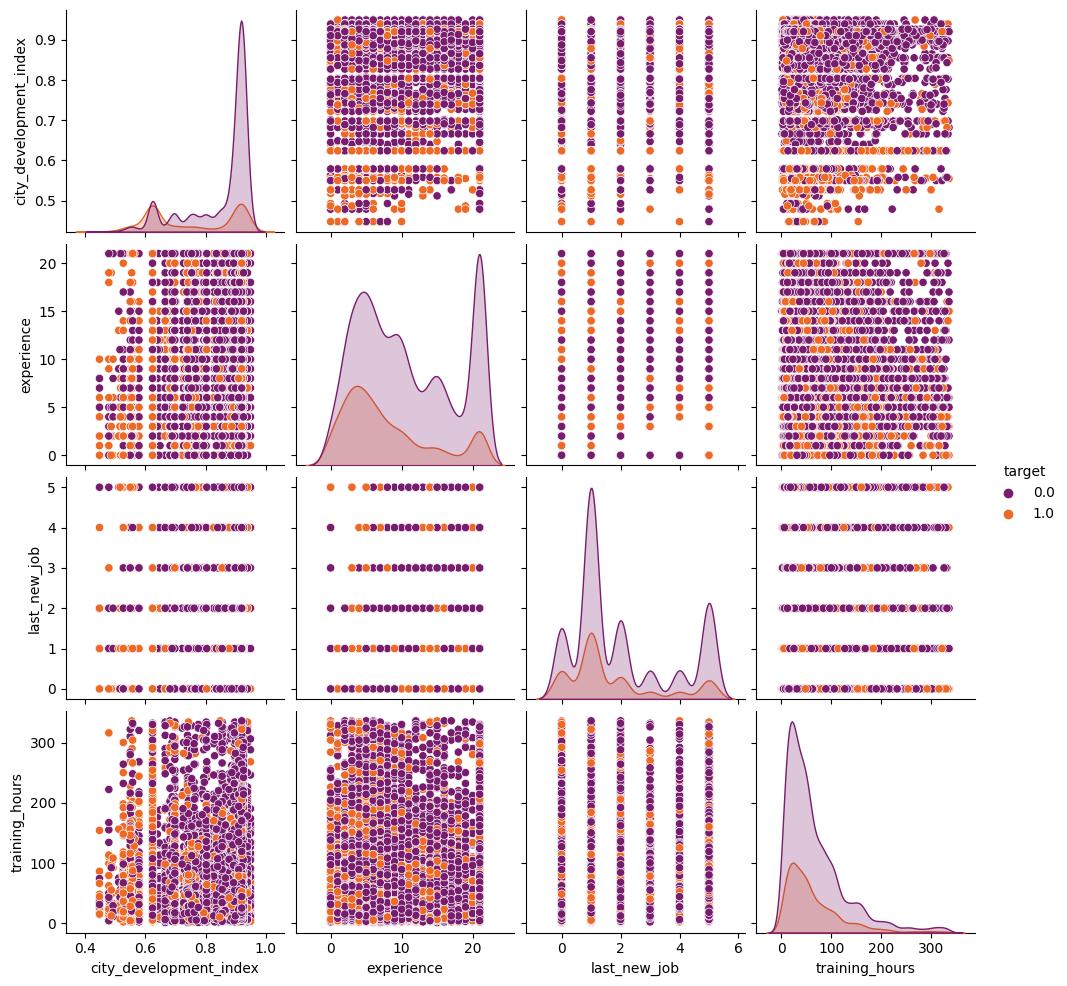

In [15]:
ax=sns.pairplot(data, hue="target", palette="inferno")
plt.show()

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
experience,19158.0,10.065873,6.790963,0.000,4.00,9.000,16.00,21.000
last_new_job,19158.0,1.956258,1.682866,0.000,1.00,1.000,3.00,5.000
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


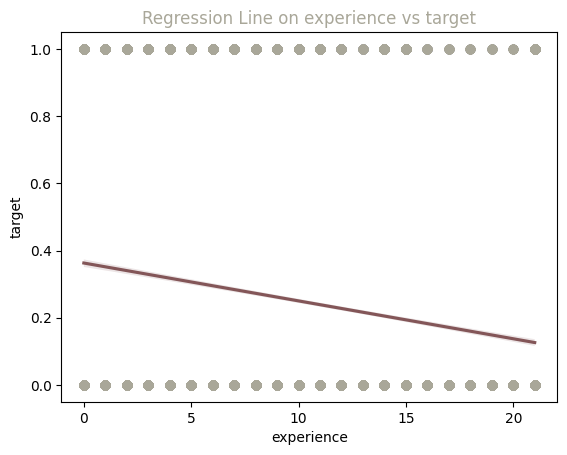

In [19]:
ax=sns.regplot(x="experience", y="target", data=data, fit_reg=True, scatter_kws={"color":"#a9a799"}, line_kws={"color":"#835658"})
ax.set_title("Regression Line on experience vs target", color="#a9a799")
plt.show()

In [20]:
data.describe()

,city_development_index,experience,last_new_job,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,0.828848,10.065873,1.956258,65.366896,0.249348
std,0.123362,6.790963,1.682866,60.058462,0.432647
min,0.448000,0.000000,0.000000,1.000000,0.000000
25%,0.740000,4.000000,1.000000,23.000000,0.000000
50%,0.903000,9.000000,1.000000,47.000000,0.000000
75%,0.920000,16.000000,3.000000,88.000000,0.000000
max,0.949000,21.000000,5.000000,336.000000,1.000000


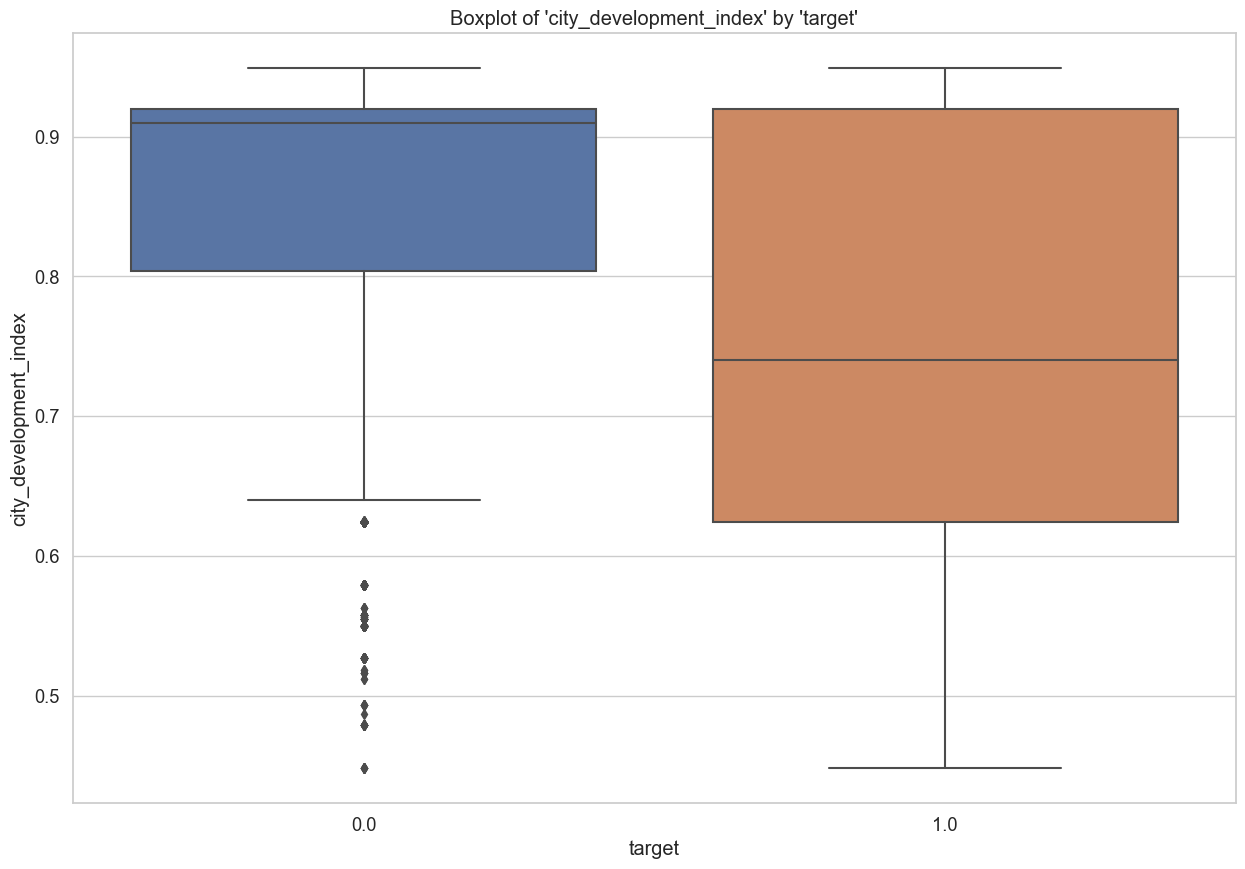

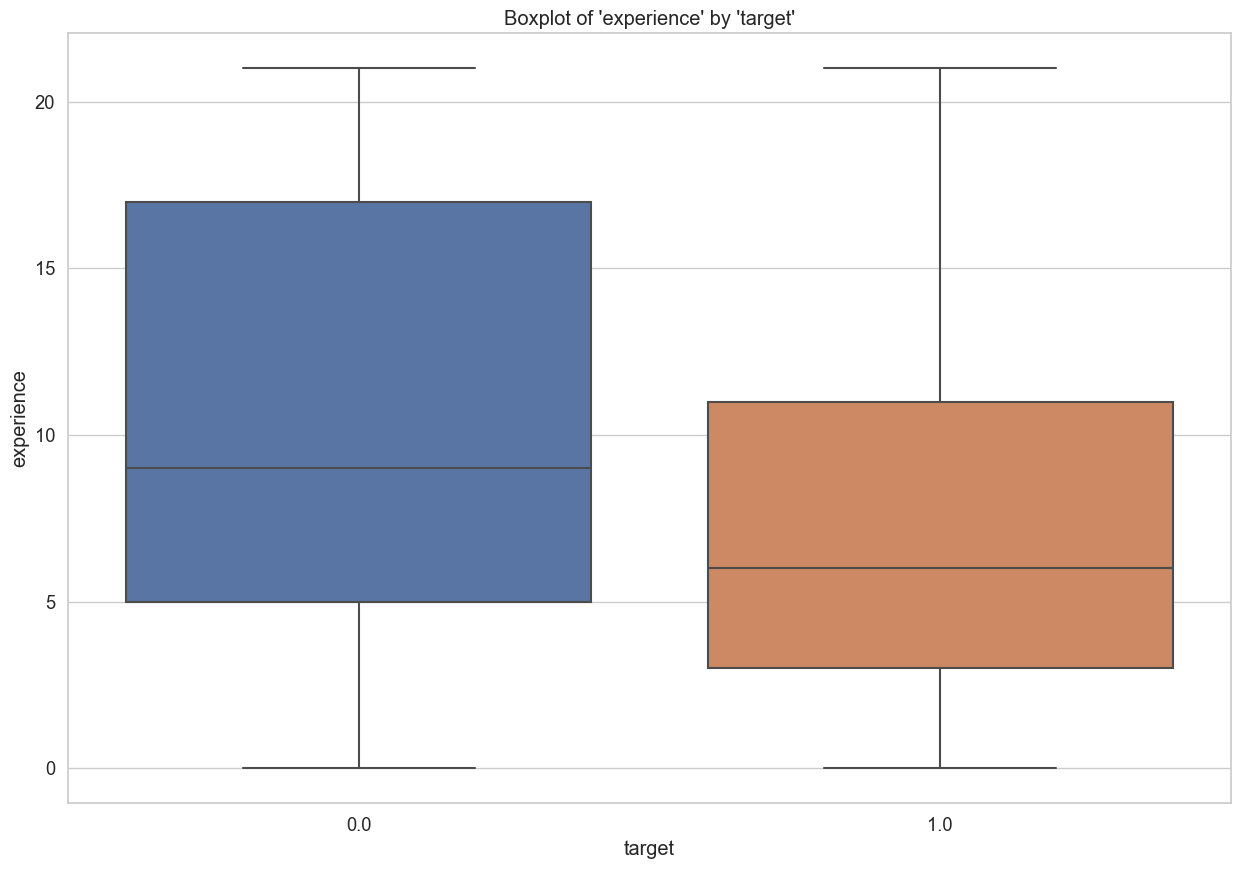

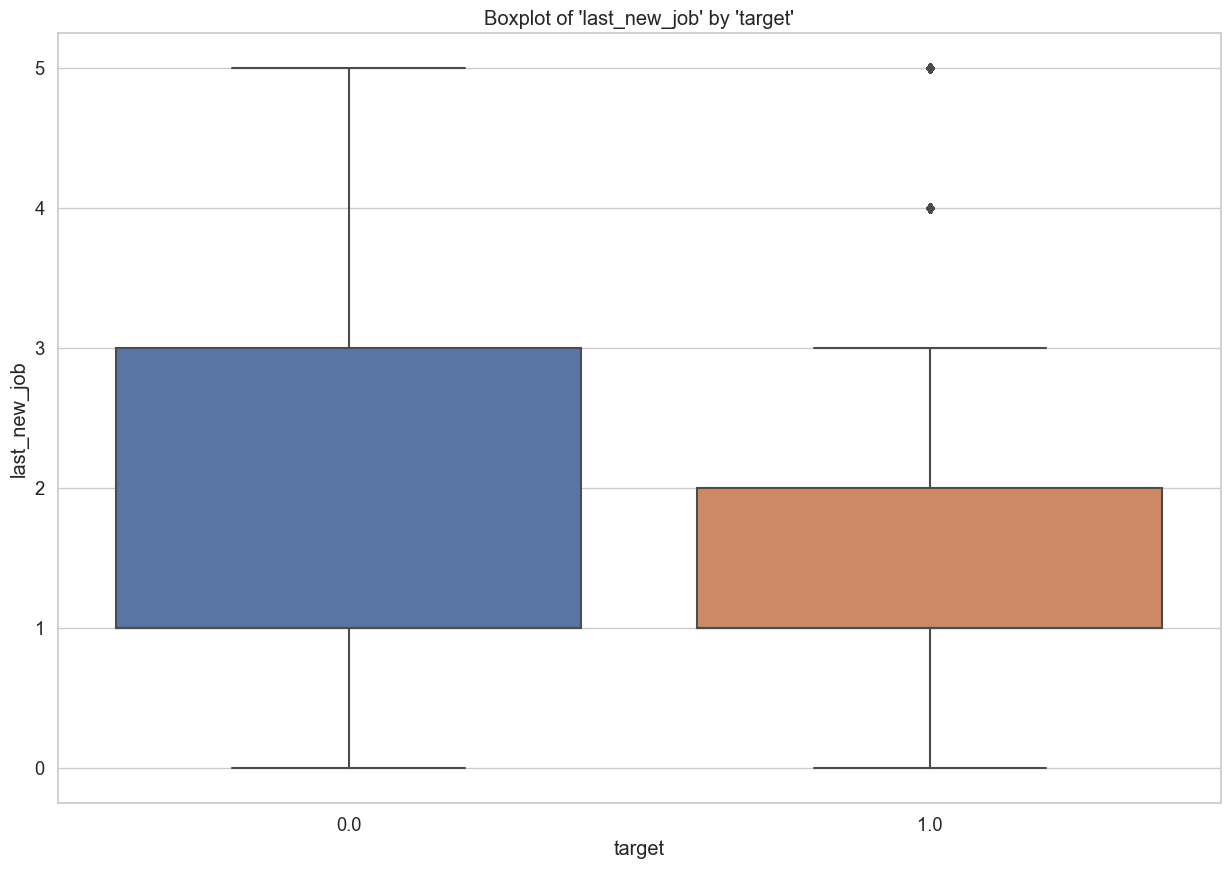

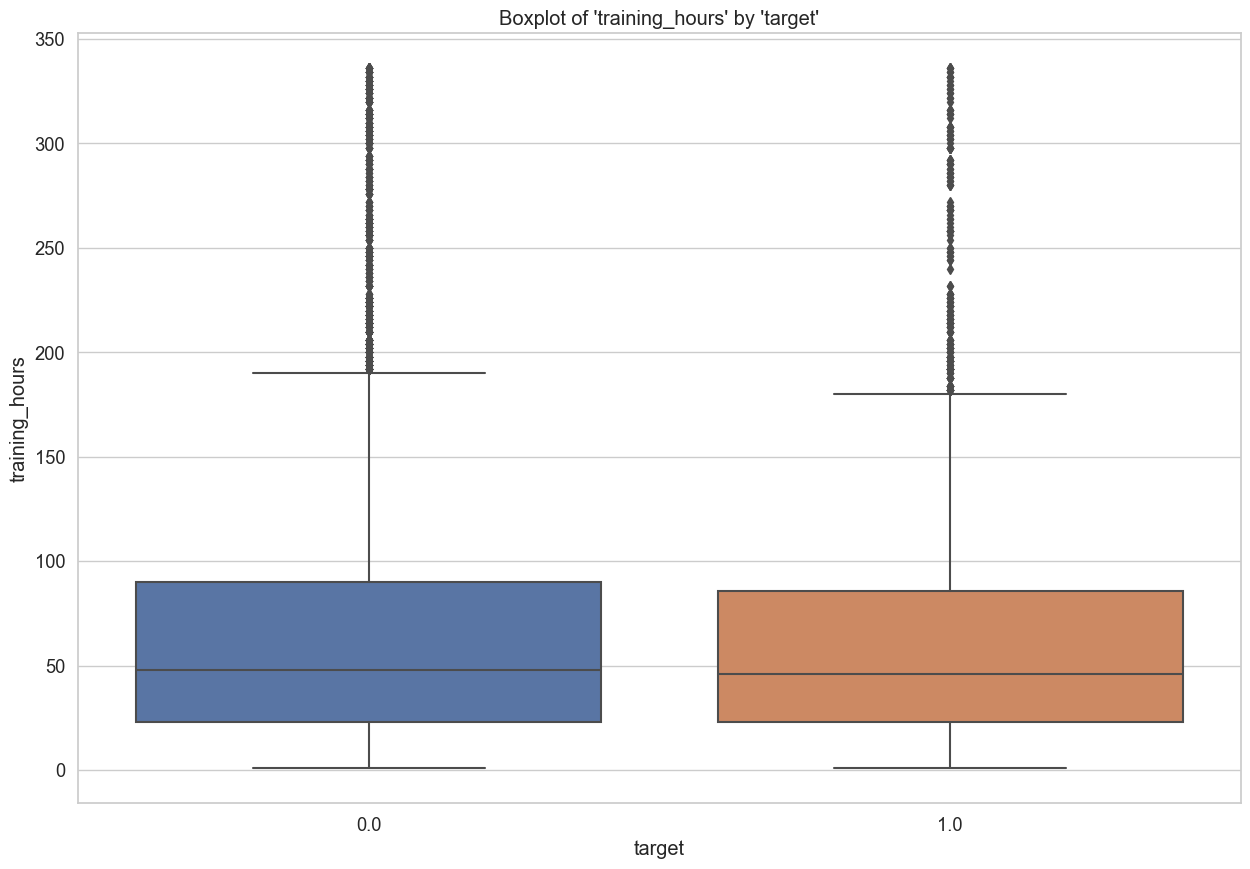

In [24]:
num_col=["city_development_index","experience","last_new_job","training_hours"]
sns.set(style="whitegrid", font_scale=1.2)

for column in num_col:
    plt.figure(figsize=(15,10))
    sns.boxplot(x="target", y=column, data=data)
    plt.title(f"Boxplot of '{column}' by 'target'")
    plt.show()

In [ ]:
# "city_development_index","last_new_job","training_hours"

In [25]:
data.shape

(19158, 13)

In [27]:
# Detecting outlier


In [28]:
data[["city_development_index","last_new_job","training_hours"]].skew()

city_development_index   -0.995428
last_new_job              0.812419
training_hours            1.819237
dtype: float64

In [29]:
data[["city_development_index","last_new_job","training_hours"]].describe()

,city_development_index,last_new_job,training_hours
count,19158.000000,19158.000000,19158.000000
mean,0.828848,1.956258,65.366896
std,0.123362,1.682866,60.058462
min,0.448000,0.000000,1.000000
25%,0.740000,1.000000,23.000000
50%,0.903000,1.000000,47.000000
75%,0.920000,3.000000,88.000000
max,0.949000,5.000000,336.000000


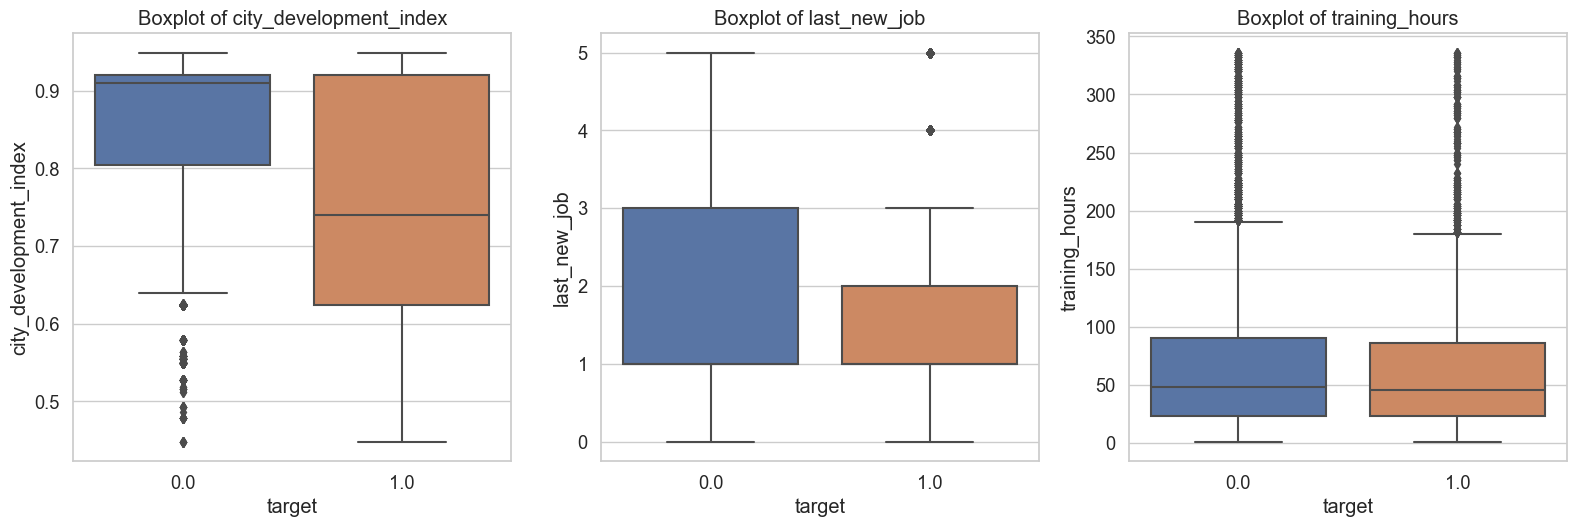

In [30]:
plt.figure(figsize=(16, 10))

# First boxplot
plt.subplot(2, 3, 1)
sns.boxplot(data=data, x="target", y="city_development_index")
plt.title("Boxplot of city_development_index")

# Second boxplot
plt.subplot(2, 3, 2)
sns.boxplot(data=data, x="target", y="last_new_job")
plt.title("Boxplot of last_new_job")

# Third boxplot
plt.subplot(2, 3, 3)
sns.boxplot(data=data, x="target", y="training_hours")
plt.title("Boxplot of training_hours")



plt.tight_layout()
plt.show()

In [31]:
# Finding IQR

In [33]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Create a new DataFrame to store the data without outliers
data_without_outliers = data.copy()

# Remove outliers for each numerical column
for column in num_col:
    data_without_outliers = remove_outliers(data_without_outliers, column)

# Print the number of rows before and after removing outliers
print("Number of rows before removing outliers:", len(data))
print("Number of rows after removing outliers:", len(data_without_outliers))

Number of rows before removing outliers: 19158
Number of rows after removing outliers: 18157


In [34]:
data_without_outliers.shape

(18157, 13)

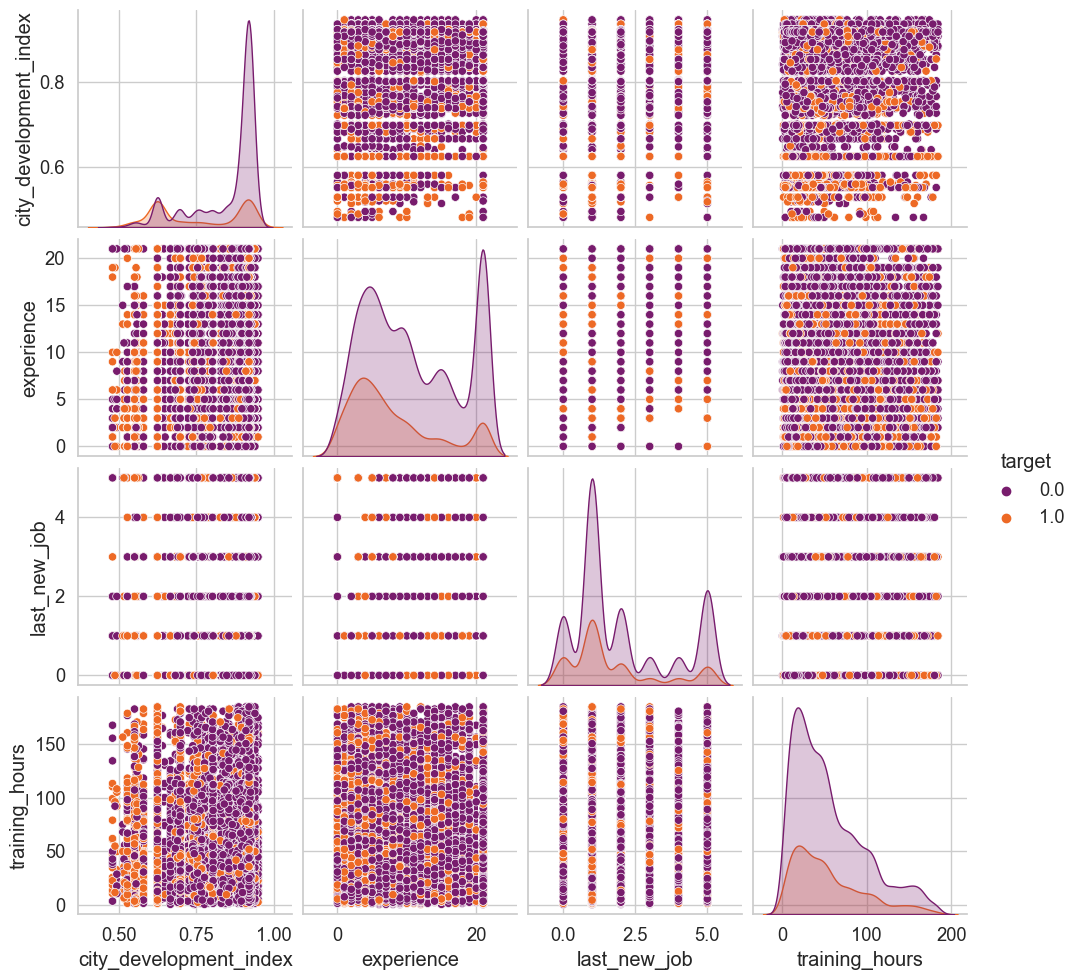

In [35]:
ax=sns.pairplot(data_without_outliers, hue= "target",palette="inferno")
plt.show()

In [40]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']


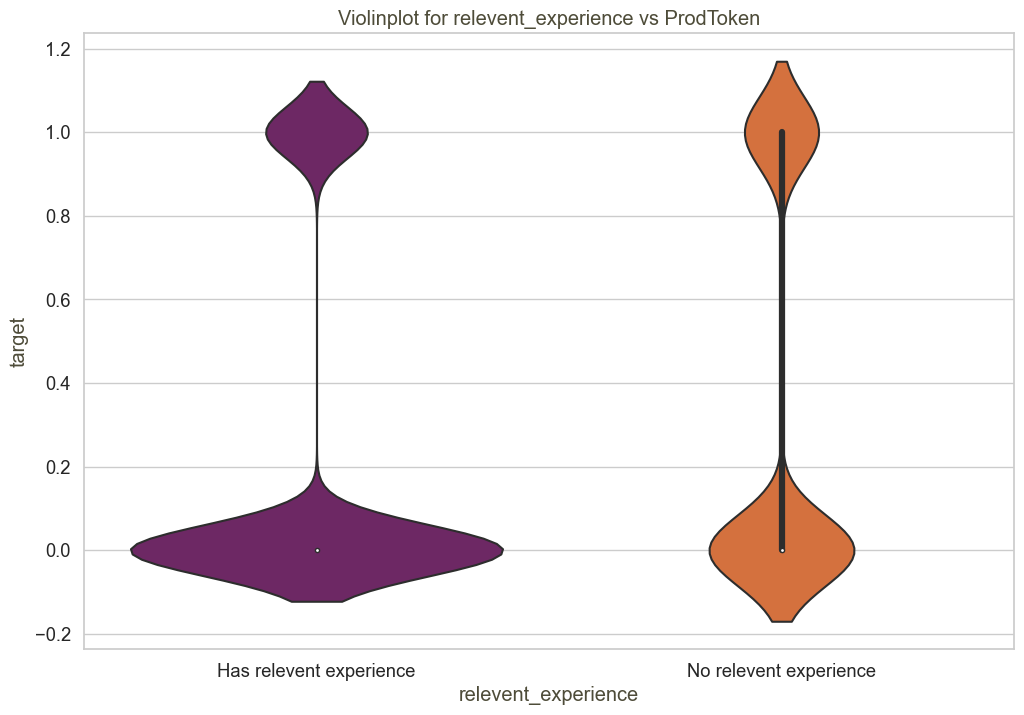

In [41]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="relevent_experience", y='target', data=data, palette='inferno', scale="count")
ax.set_title("Violinplot for relevent_experience vs ProdToken", color="#4e4c39")
ax.set_ylabel("target", color="#4e4c39")
ax.set_xlabel("relevent_experience", color="#4e4c39")
plt.show()

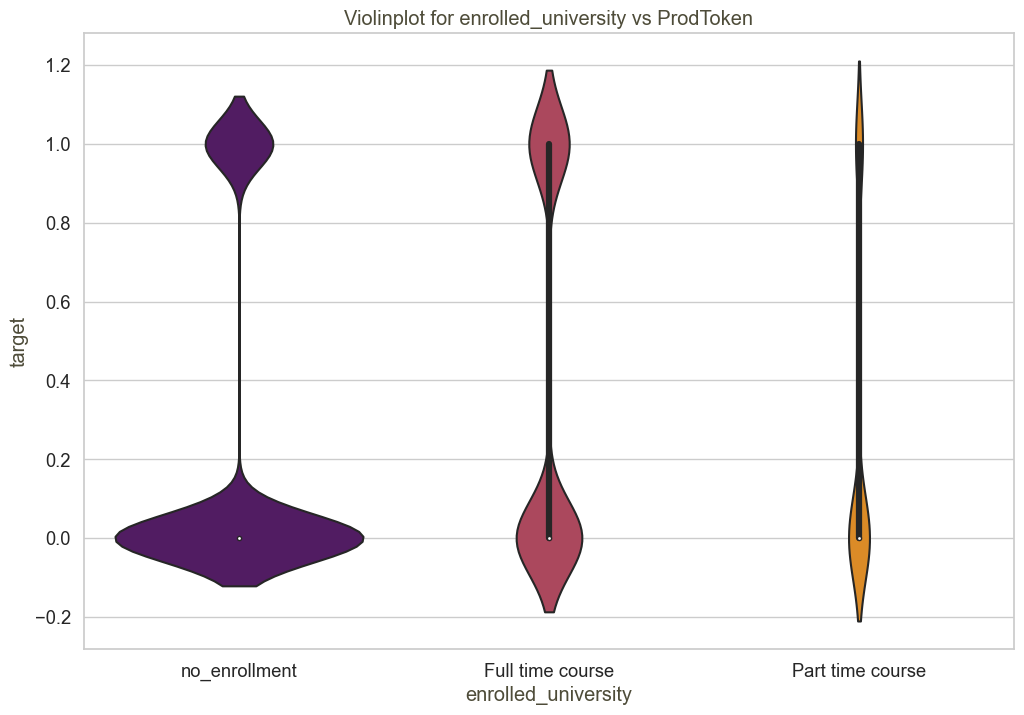

In [42]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="enrolled_university", y='target', data=data, palette='inferno', scale="count")
ax.set_title("Violinplot for enrolled_university vs ProdToken", color="#4e4c39")
ax.set_ylabel("target", color="#4e4c39")
ax.set_xlabel("enrolled_university", color="#4e4c39")
plt.show()

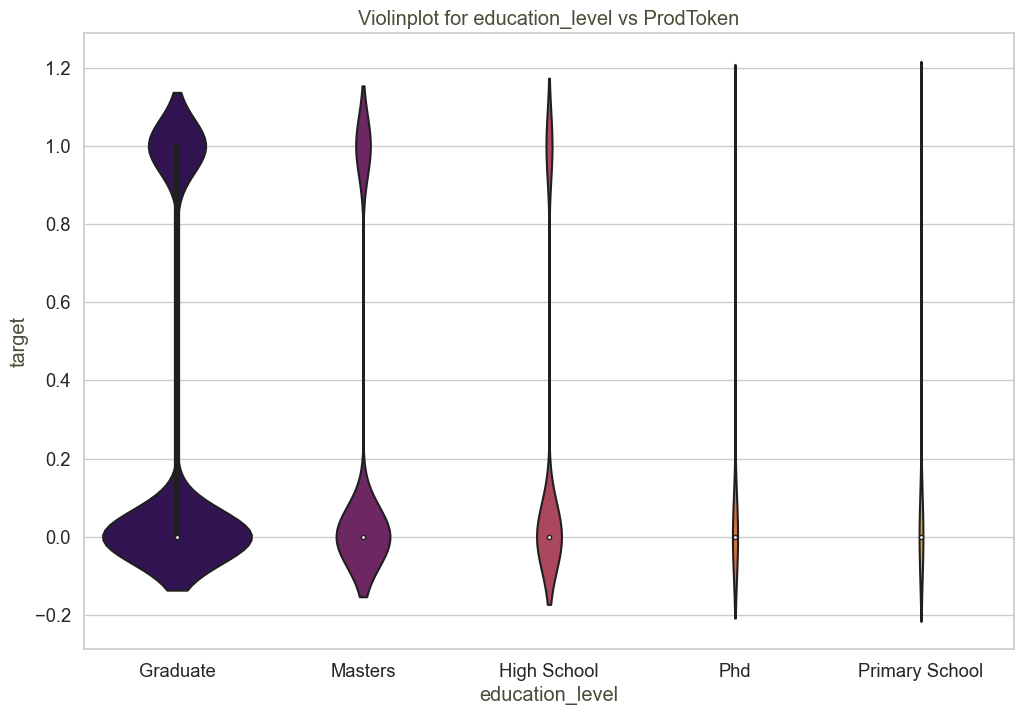

In [43]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="education_level", y='target', data=data, palette='inferno', scale="count")
ax.set_title("Violinplot for education_level vs ProdToken", color="#4e4c39")
ax.set_ylabel("target", color="#4e4c39")
ax.set_xlabel("education_level", color="#4e4c39")
plt.show()

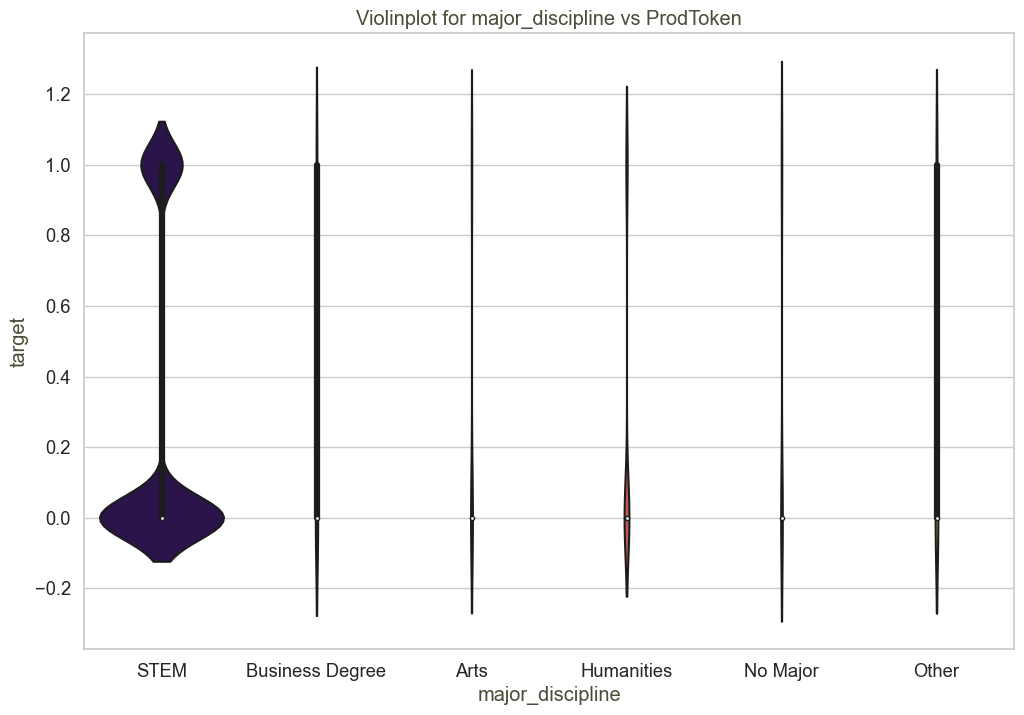

In [44]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="major_discipline", y='target', data=data, palette='inferno', scale="count")
ax.set_title("Violinplot for major_discipline vs ProdToken", color="#4e4c39")
ax.set_ylabel("target", color="#4e4c39")
ax.set_xlabel("major_discipline", color="#4e4c39")
plt.show()

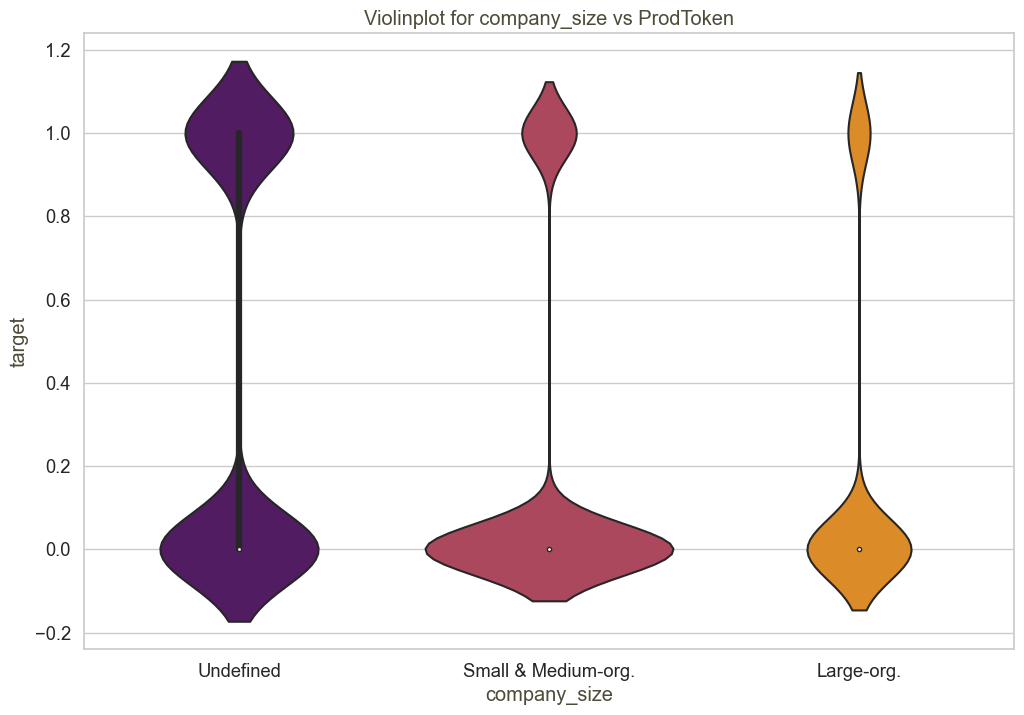

In [45]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="company_size", y='target', data=data, palette='inferno', scale="count")
ax.set_title("Violinplot for company_size vs ProdToken", color="#4e4c39")
ax.set_ylabel("target", color="#4e4c39")
ax.set_xlabel("company_size", color="#4e4c39")
plt.show()

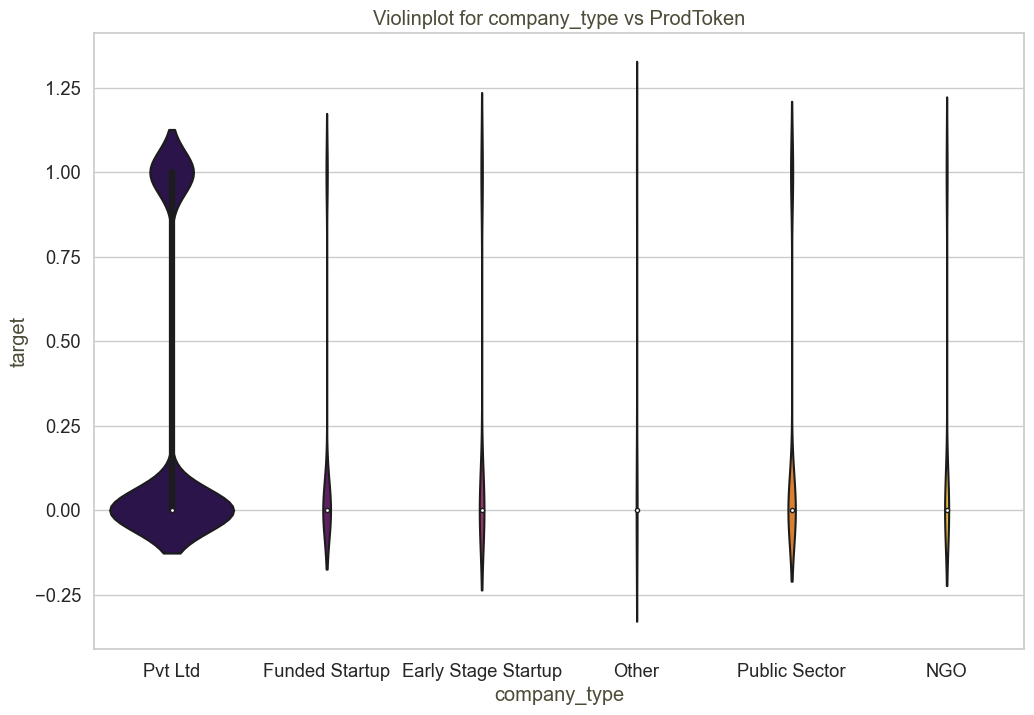

In [46]:
plt.figure(figsize=(12,8))
ax=sns.violinplot(x="company_type", y='target', data=data, palette='inferno', scale="count")
ax.set_title("Violinplot for company_type vs ProdToken", color="#4e4c39")
ax.set_ylabel("target", color="#4e4c39")
ax.set_xlabel("company_type", color="#4e4c39")
plt.show()

# Label Encoder

In [47]:
label_data = data.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,0,2,0,5,21,2,5,1,36,1.0
1,0.776,1,2,0,5,15,1,5,5,47,0.0
2,0.624,1,0,0,5,5,2,5,0,83,0.0
3,0.789,1,2,0,1,0,2,5,0,52,1.0
4,0.767,0,2,2,5,21,1,1,4,8,0.0


In [49]:
data.describe()

,city_development_index,experience,last_new_job,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,0.828848,10.065873,1.956258,65.366896,0.249348
std,0.123362,6.790963,1.682866,60.058462,0.432647
min,0.448000,0.000000,0.000000,1.000000,0.000000
25%,0.740000,4.000000,1.000000,23.000000,0.000000
50%,0.903000,9.000000,1.000000,47.000000,0.000000
75%,0.920000,16.000000,3.000000,88.000000,0.000000
max,0.949000,21.000000,5.000000,336.000000,1.000000


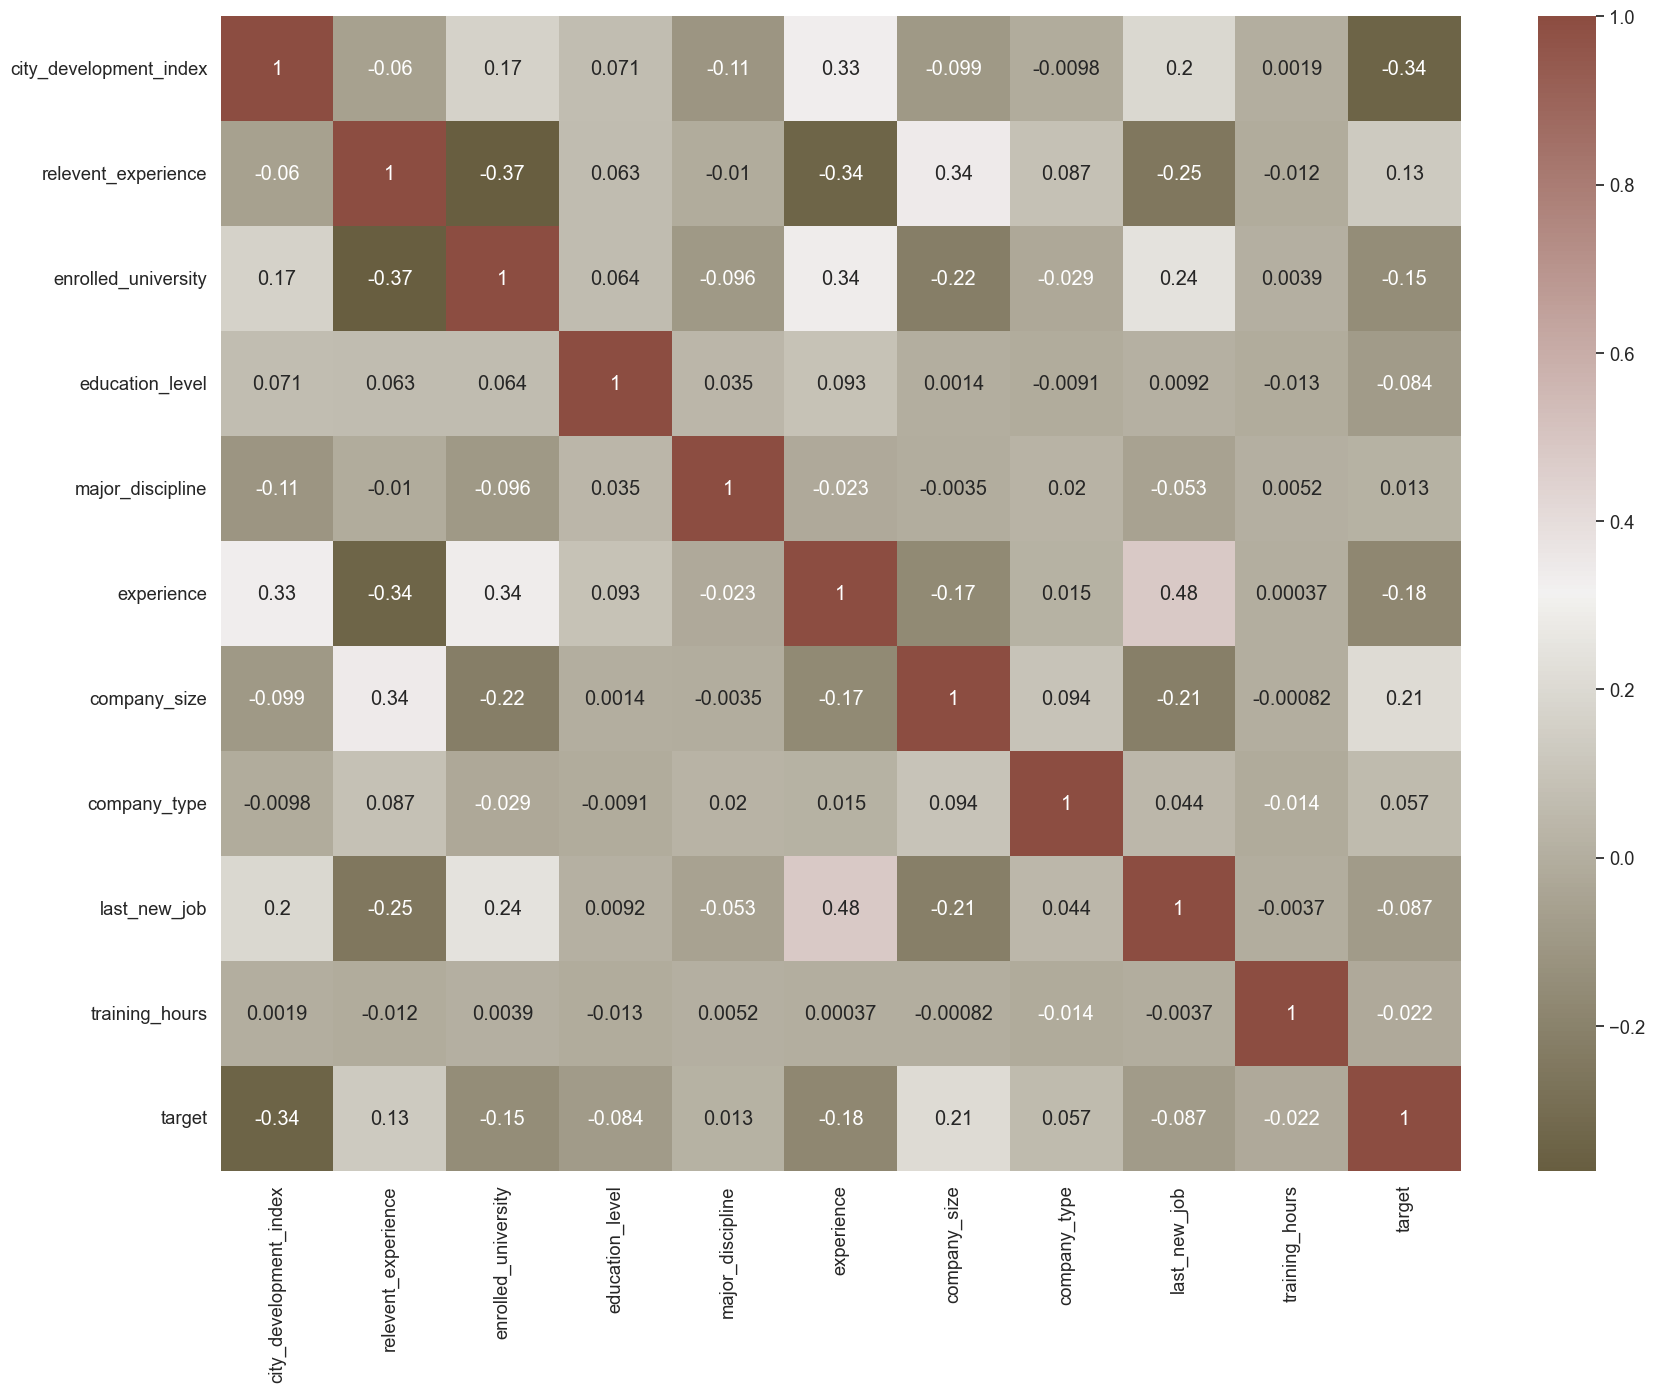

In [50]:
# Correlation Matrix
cmap = sns.diverging_palette(70,20,s=50,l=40,n=6, as_cmap=True)
corrmat=label_data.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat,cmap=cmap,annot=True)
plt.show()

In [51]:
# Model Building

In [52]:
X=label_data.drop(["target"], axis=1)
y=label_data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [55]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [58]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -0.395036 
DecisionTree: -0.534184 
RandomForest: -0.395954 
KNeighbors: -0.411139 
XGBRegressor: -0.391338 


In [59]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [60]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.1723644356430576
Adjusted R^2: 0.17063261818259112
MAE: 0.29131410459022106
MSE: 0.1576988414403374
RMSE: 0.39711313430852097
